In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("../data/crime_data_from_2020.csv")
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277


In [5]:
df['Weapon Desc'].value_counts()

Weapon Desc
STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)    165841
UNKNOWN WEAPON/OTHER WEAPON                        33359
VERBAL THREAT                                      22664
HAND GUN                                           19162
SEMI-AUTOMATIC PISTOL                               6940
                                                   ...  
MAC-11 SEMIAUTOMATIC ASSAULT WEAPON                    3
HECKLER & KOCH 91 SEMIAUTOMATIC ASSAULT RIFLE          2
MAC-10 SEMIAUTOMATIC ASSAULT WEAPON                    2
M1-1 SEMIAUTOMATIC ASSAULT RIFLE                       1
M-14 SEMIAUTOMATIC ASSAULT RIFLE                       1
Name: count, Length: 79, dtype: int64

In [5]:
df['Vict Sex'].value_counts()

Vict Sex
M    366735
F    326890
X     80910
H        97
-         1
Name: count, dtype: int64

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892934 entries, 0 to 892933
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           892934 non-null  int64  
 1   Date Rptd       892934 non-null  object 
 2   DATE OCC        892934 non-null  object 
 3   TIME OCC        892934 non-null  int64  
 4   AREA            892934 non-null  int64  
 5   AREA NAME       892934 non-null  object 
 6   Rpt Dist No     892934 non-null  int64  
 7   Part 1-2        892934 non-null  int64  
 8   Crm Cd          892934 non-null  int64  
 9   Crm Cd Desc     892934 non-null  object 
 10  Mocodes         768605 non-null  object 
 11  Vict Age        892934 non-null  int64  
 12  Vict Sex        774633 non-null  object 
 13  Vict Descent    774625 non-null  object 
 14  Premis Cd       892924 non-null  float64
 15  Premis Desc     892386 non-null  object 
 16  Weapon Used Cd  309539 non-null  float64
 17  Weapon Des

In [4]:
df.describe().apply(lambda x: x.apply('{0:5f}'.format)).T

,count,mean,std,min,25%,50%,75%,max
DR_NO,892934.000000,217599056.047236,11581430.924393,817.000000,210317839.500000,220410083.500000,230311516.750000,249904551.000000
TIME OCC,892934.000000,1336.652506,653.157043,1.000000,900.000000,1415.000000,1900.000000,2359.000000
AREA,892934.000000,10.700167,6.102301,1.000000,6.000000,11.000000,16.000000,21.000000
Rpt Dist No,892934.000000,1116.451424,610.234555,101.000000,615.000000,1141.000000,1615.000000,2199.000000
Part 1-2,892934.000000,1.411286,0.492067,1.000000,1.000000,1.000000,2.000000,2.000000
Crm Cd,892934.000000,500.782104,207.633373,110.000000,331.000000,442.000000,626.000000,956.000000
Vict Age,892934.000000,29.642293,21.834910,-3.000000,0.000000,31.000000,45.000000,120.000000
Premis Cd,892924.000000,306.403196,217.283948,101.000000,101.000000,203.000000,501.000000,976.000000
Weapon Used Cd,309539.000000,363.379002,123.698899,101.000000,310.000000,400.000000,400.000000,516.000000
Crm Cd 1,892923.000000,500.524224,207.424134,110.000000,331.000000,442.000000,626.000000,956.000000


### Remove some variables

In [5]:
df.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

In [6]:
df = df.drop(['DR_NO', 'Date Rptd', 'AREA', 'Rpt Dist No', 'Crm Cd', 'Mocodes', 'Premis Cd', 'Weapon Used Cd', 'Status',
              'Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'Cross Street', 'Part 1-2'], axis=1)
df.head()

,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Desc,Weapon Desc,Status Desc,LOCATION,LAT,LON
0,03/01/2020 12:00:00 AM,2130,Wilshire,VEHICLE - STOLEN,0,M,O,STREET,NaN,Adult Arrest,1900 S LONGWOOD AV,34.0375,-118.3506
1,02/08/2020 12:00:00 AM,1800,Central,BURGLARY FROM VEHICLE,47,M,O,BUS STOP/LAYOVER (ALSO QUERY 124),NaN,Invest Cont,1000 S FLOWER ST,34.0444,-118.2628
2,11/04/2020 12:00:00 AM,1700,Southwest,BIKE - STOLEN,19,X,X,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,Invest Cont,1400 W 37TH ST,34.0210,-118.3002
3,03/10/2020 12:00:00 AM,2037,Van Nuys,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19,M,O,CLOTHING STORE,NaN,Invest Cont,14000 RIVERSIDE DR,34.1576,-118.4387
4,08/17/2020 12:00:00 AM,1200,Hollywood,THEFT OF IDENTITY,28,M,H,SIDEWALK,NaN,Invest Cont,1900 TRANSIENT,34.0944,-118.3277


### Reassign values

In [7]:
# Convert DATE OCC to datetime value type
df['DATE OCC'] = df['DATE OCC'].str.split(' ').str[0]
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])

# Convert TIME OCC to datetime value type
df['TIME OCC'] = df['TIME OCC'].apply(lambda x: f"{str(x).zfill(4)}")
df['TIME OCC'] = pd.to_datetime(df['TIME OCC'], format='%H%M').dt.time

In [8]:
df.head()

,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Desc,Weapon Desc,Status Desc,LOCATION,LAT,LON
0,2020-03-01,21:30:00,Wilshire,VEHICLE - STOLEN,0,M,O,STREET,NaN,Adult Arrest,1900 S LONGWOOD AV,34.0375,-118.3506
1,2020-02-08,18:00:00,Central,BURGLARY FROM VEHICLE,47,M,O,BUS STOP/LAYOVER (ALSO QUERY 124),NaN,Invest Cont,1000 S FLOWER ST,34.0444,-118.2628
2,2020-11-04,17:00:00,Southwest,BIKE - STOLEN,19,X,X,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,Invest Cont,1400 W 37TH ST,34.0210,-118.3002
3,2020-03-10,20:37:00,Van Nuys,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19,M,O,CLOTHING STORE,NaN,Invest Cont,14000 RIVERSIDE DR,34.1576,-118.4387
4,2020-08-17,12:00:00,Hollywood,THEFT OF IDENTITY,28,M,H,SIDEWALK,NaN,Invest Cont,1900 TRANSIENT,34.0944,-118.3277


In [9]:
# Change Vict Sex Values names
df['Vict Sex'] = df['Vict Sex'].replace({'F': 'Female', 'M': 'Male', 'X': 'Unknown'})

In [10]:
# Change Vict Descent Values names
df['Vict Descent'] = df['Vict Descent'].replace(
    {'A': 'Other Asian', 'B': 'Black', 'C': 'Chinese', 'D': 'Cambodian', 'F': 'Filipino', 'G': 'Guamanian',
     'H': 'Hispanic/Latin/Mexican', 'I': 'American Indian/Alaskan Native', 'J': 'Japanese', 'K': 'Korean',
     'L': 'Laotian', 'O': 'Other', 'P': 'Pacific Islander', 'S': 'Samoan', 'U': 'Hawaiian', 'V': 'Vietnamese',
     'W': 'White', 'X': 'Unknown', 'Z': 'Asian Indina'})


In [11]:
df.head()

,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Desc,Weapon Desc,Status Desc,LOCATION,LAT,LON
0,2020-03-01,21:30:00,Wilshire,VEHICLE - STOLEN,0,Male,Other,STREET,NaN,Adult Arrest,1900 S LONGWOOD AV,34.0375,-118.3506
1,2020-02-08,18:00:00,Central,BURGLARY FROM VEHICLE,47,Male,Other,BUS STOP/LAYOVER (ALSO QUERY 124),NaN,Invest Cont,1000 S FLOWER ST,34.0444,-118.2628
2,2020-11-04,17:00:00,Southwest,BIKE - STOLEN,19,Unknown,Unknown,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,Invest Cont,1400 W 37TH ST,34.0210,-118.3002
3,2020-03-10,20:37:00,Van Nuys,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19,Male,Other,CLOTHING STORE,NaN,Invest Cont,14000 RIVERSIDE DR,34.1576,-118.4387
4,2020-08-17,12:00:00,Hollywood,THEFT OF IDENTITY,28,Male,Hispanic/Latin/Mexican,SIDEWALK,NaN,Invest Cont,1900 TRANSIENT,34.0944,-118.3277


In [12]:
df['Status Desc'] = df['Status Desc'].replace({'Invest Cont': 'Investigation Continuous',
                                               'Adult Other': 'Adult Other',
                                               'Adult Arrest': 'Adult Arrest',
                                               'Juv Arrest': 'Juvenile Arrest',
                                               'Juv Other': 'Juvenile Other',
                                               'UNK': 'Unknown'})
df['Status Desc'].value_counts()

Status Desc
Investigation Continuous    714928
Adult Other                  96122
Adult Arrest                 77409
Juvenile Arrest               2894
Juvenile Other                1577
Unknown                          4
Name: count, dtype: int64

In [13]:
# Remove whitespace on Location
df['LOCATION'] = df['LOCATION'].str.replace(r'\s+', ' ', regex=True).str.strip()

### Missing Values

In [14]:
df.head()

,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Desc,Weapon Desc,Status Desc,LOCATION,LAT,LON
0,2020-03-01,21:30:00,Wilshire,VEHICLE - STOLEN,0,Male,Other,STREET,NaN,Adult Arrest,1900 S LONGWOOD AV,34.0375,-118.3506
1,2020-02-08,18:00:00,Central,BURGLARY FROM VEHICLE,47,Male,Other,BUS STOP/LAYOVER (ALSO QUERY 124),NaN,Investigation Continuous,1000 S FLOWER ST,34.0444,-118.2628
2,2020-11-04,17:00:00,Southwest,BIKE - STOLEN,19,Unknown,Unknown,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,Investigation Continuous,1400 W 37TH ST,34.0210,-118.3002
3,2020-03-10,20:37:00,Van Nuys,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19,Male,Other,CLOTHING STORE,NaN,Investigation Continuous,14000 RIVERSIDE DR,34.1576,-118.4387
4,2020-08-17,12:00:00,Hollywood,THEFT OF IDENTITY,28,Male,Hispanic/Latin/Mexican,SIDEWALK,NaN,Investigation Continuous,1900 TRANSIENT,34.0944,-118.3277


In [15]:
df.isna().sum()

DATE OCC             0
TIME OCC             0
AREA NAME            0
Crm Cd Desc          0
Vict Age             0
Vict Sex        118301
Vict Descent    118309
Premis Desc        548
Weapon Desc     583395
Status Desc          0
LOCATION             0
LAT                  0
LON                  0
dtype: int64

In [16]:
df['Vict Age'].value_counts()

Vict Age
 0      224056
 30      20240
 35      19897
 31      19372
 29      19345
         ...  
-1          67
 97         66
-2          15
-3           2
 120         1
Name: count, Length: 103, dtype: int64

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

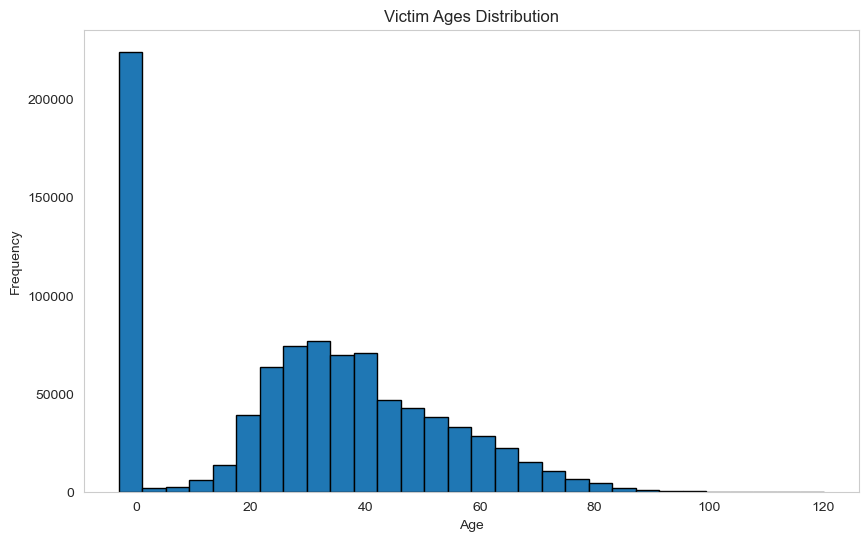

In [19]:
plt.figure(figsize=(10, 6))

plt.hist(df['Vict Age'], bins=30, edgecolor='black')

plt.title('Victim Ages Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.grid()
plt.show()

In [20]:
df = df[df['Vict Age'] >= 0]

In [21]:
df['Vict Age'].value_counts()

Vict Age
0      224056
30      20240
35      19897
31      19372
29      19345
        ...  
95         93
96         92
98         69
97         66
120         1
Name: count, Length: 100, dtype: int64

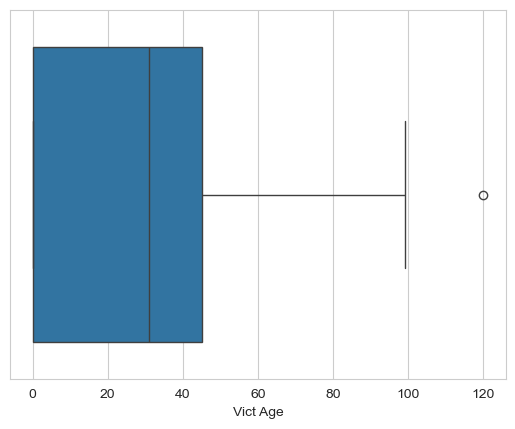

In [23]:
sns.boxplot(data=df, x=df["Vict Age"]);


In [27]:
# Sex Victim
values_sex = df['Vict Sex'].value_counts()

In [28]:
percentages = (values_sex / len(df['Vict Sex'])) * 100

percentages

Vict Sex
Male       41.072745
Female     36.610965
Unknown     9.055496
H           0.010864
-           0.000112
Name: count, dtype: float64

In [ ]:
df = df[df['Vict Age'] >= 0]

In [36]:
df = df[df['Vict Sex'].isin(['Male', 'Female'])]

print(f'df shape is: {df.shape}')
df['Vict Sex'].value_counts()

df shape is: (693599, 13)


Vict Sex
Male      366718
Female    326881
Name: count, dtype: int64

In [38]:
df.head()

,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Desc,Weapon Desc,Status Desc,LOCATION,LAT,LON
0,2020-03-01,21:30:00,Wilshire,VEHICLE - STOLEN,0,Male,Other,STREET,NaN,Adult Arrest,1900 S LONGWOOD AV,34.0375,-118.3506
1,2020-02-08,18:00:00,Central,BURGLARY FROM VEHICLE,47,Male,Other,BUS STOP/LAYOVER (ALSO QUERY 124),NaN,Investigation Continuous,1000 S FLOWER ST,34.0444,-118.2628
3,2020-03-10,20:37:00,Van Nuys,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19,Male,Other,CLOTHING STORE,NaN,Investigation Continuous,14000 RIVERSIDE DR,34.1576,-118.4387
4,2020-08-17,12:00:00,Hollywood,THEFT OF IDENTITY,28,Male,Hispanic/Latin/Mexican,SIDEWALK,NaN,Investigation Continuous,1900 TRANSIENT,34.0944,-118.3277
5,2020-12-01,23:00:00,Southeast,THEFT OF IDENTITY,41,Male,Hispanic/Latin/Mexican,SINGLE FAMILY DWELLING,NaN,Investigation Continuous,9900 COMPTON AV,33.9467,-118.2463


In [40]:
df['Status Desc'].value_counts()

Status Desc
Investigation Continuous    535625
Adult Other                  89933
Adult Arrest                 64243
Juvenile Arrest               2403
Juvenile Other                1391
Unknown                          4
Name: count, dtype: int64

In [41]:
# Status Desc
df = df[df['Status Desc'] != 'Unknown']

df['Status Desc'].value_counts()

Status Desc
Investigation Continuous    535625
Adult Other                  89933
Adult Arrest                 64243
Juvenile Arrest               2403
Juvenile Other                1391
Name: count, dtype: int64

## Save File

In [42]:
csv_file_path = '../data/cleaned_data-crime.csv'
df.to_csv(csv_file_path, index=False)
